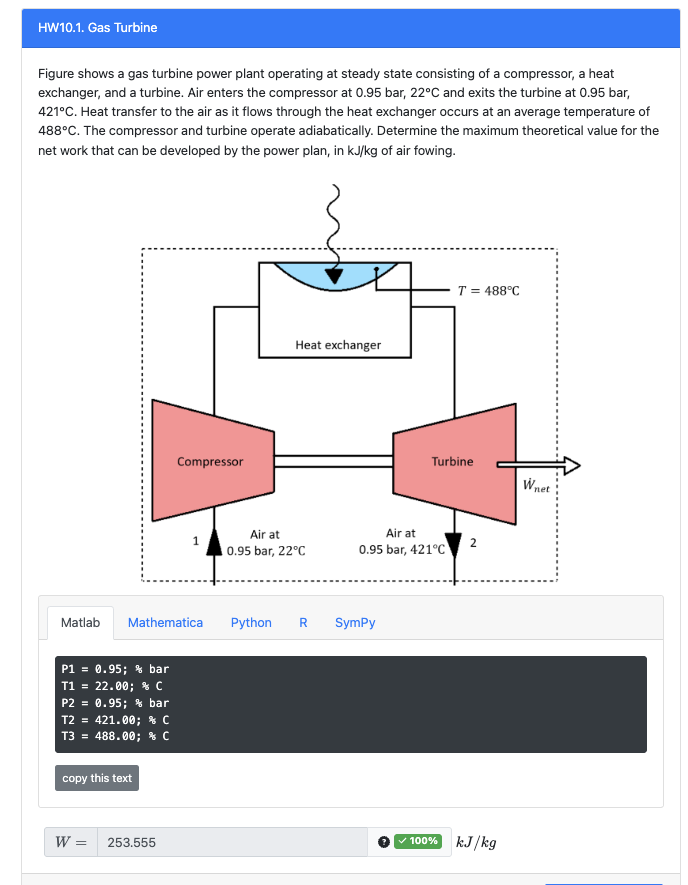

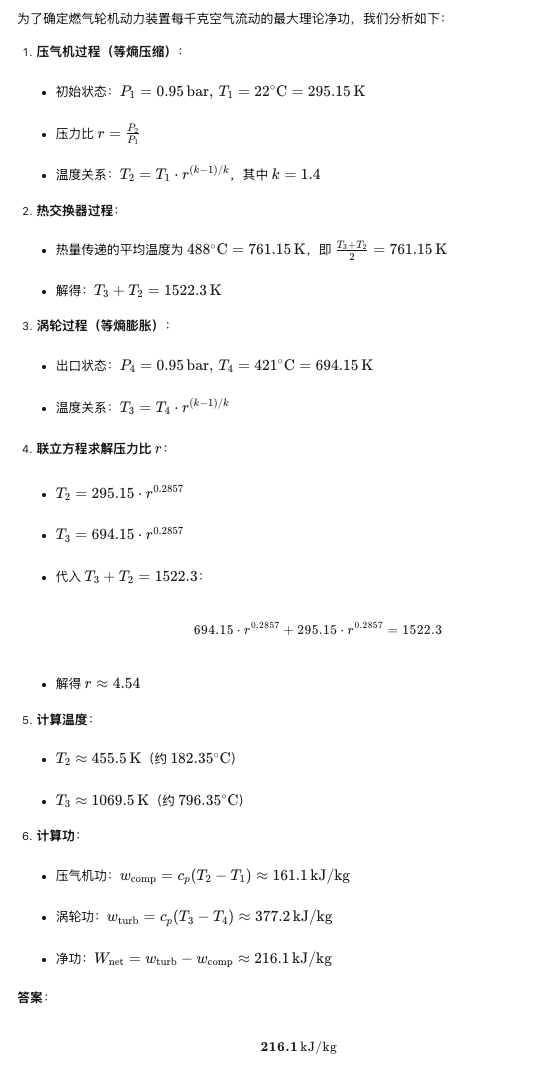

In [ ]:
# 1
# 其实很简单就是考等熵的。
# 思路 首先看题目中adiability in compressor and turbine所以等熵，所以可以设copmressor输出的p3.然后用这个表示T2，因此没有设p3，而是直接设的r


from sympy import *
r=S('r')


T1=22+273.15
To=421+273.15
Theater=488+273.15


h2=705.26
h1=295.17




T2=T1*r**(0.4/1.4)
T3=Theater*2-T2
T4=T3/r**(0.4/1.4)
q1=T4-To

r=solve(q1)[0]



T1=22+273.15
T2=T1*r**(0.4/1.4)
T3=Theater*2-T2
T4=T3/r**(0.4/1.4)
print(T2)
cp=(1.020+1.005)/2
wcomp=cp*(T2-T1)
wcomp

print(T3,T4)
cp2=(1.075+1.142)/2
wturb=cp2*(T3-T4)
wturb-wcomp



454.166425755585
1068.13357424442 694.150000000000


253.556660972405

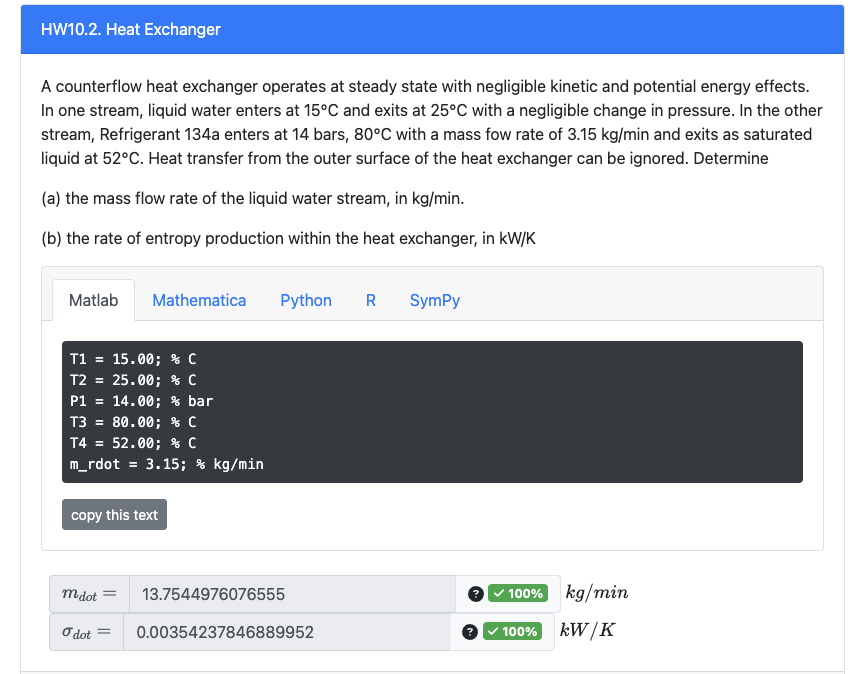

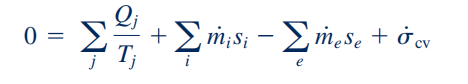

In [14]:
# 2
# 这里是不是视作U=0，W=0 所以Q=m*(ho-hi)
# sigma还是用上面这个式子 因为没有Q的流入，所以只有m1*dertas1+m2*dertas2


from sympy import *

T1 = 15.00 # C
T2 = 25.00 # C
P1 = 14.00 # bar
T3 = 80.00 # C
T4 = 52.00 # C
m_rdot = 3.15 # kg/min

T1=T1+273.15
T2=T2+273.15
T3=T3+273.15
T4=T4+273.15

m2=m_rdot
cpwater=4.18 #kj/kg/k

m1=S("m1")
Q1=cpwater*m1*(T2-T1)

hi=307.1 # kj/kg
ho=124.58

q1=m2*(ho-hi)+Q1
m1=solve(q1)[0]
print(m1)






# 第一种直接找dertas的计算方式
s11=0.2245
s12=0.3674
derta_s1=s12-s11
# 第二种找dertas的计算方式
# ln(T2/T1)*cpwater


# 第一种直接找dertas的计算方式
s21=0.9997
s22=0.4432
derta_s2=s22-s21
# 第二种找dertas的计算方式
# (307.1-124.58)/(T3+T4)*2

sigma=m1*derta_s1+m2*derta_s2
print(sigma/60)






13.7544976076555
0.00354237846889952


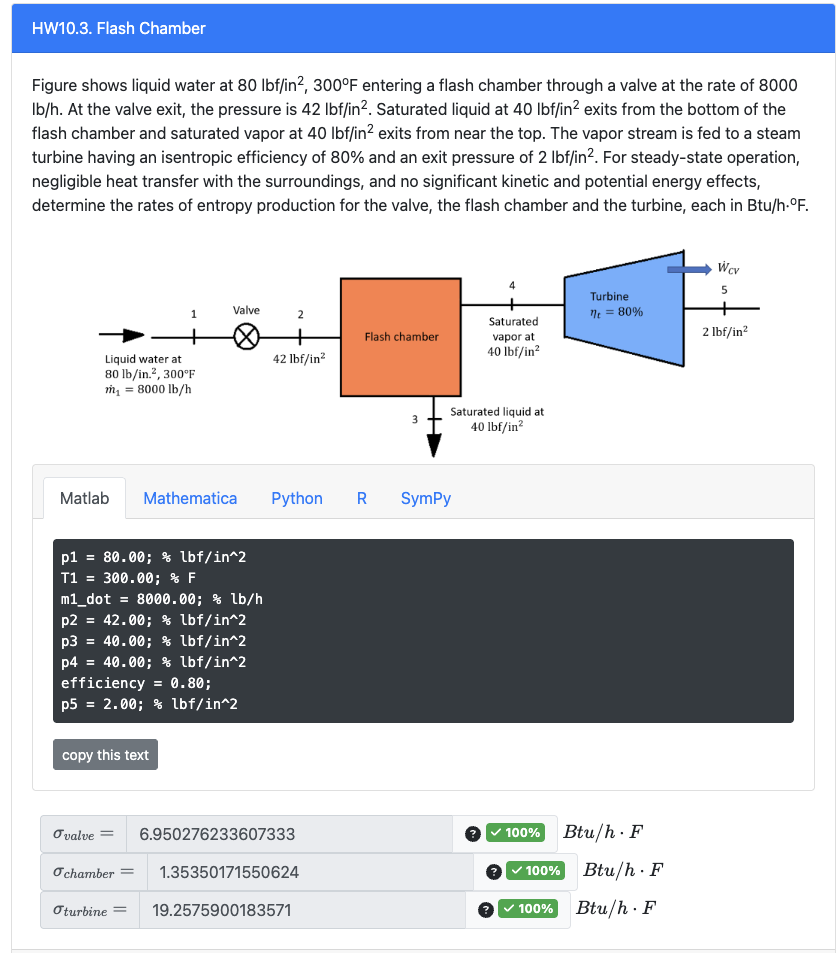

In [62]:
# 3
# 第一步 通过 valve保持h不变的到出口的质量分数 x，然后得到s2，进而sigma_valve = (m1_dot) * (s2 - s1)  # 转换为 Btu/(h·°F)

# 第二步 通过 chamber保持h不变得到质量分数x，然后得到两个质量，进而sigma_chamber = (m3) * (s3 - s2) + (m4) * (s4 - s2)

# 第三步， 若idea gas可以看example6.12 p324
# given p1,p2,T1,等熵 want h2
# 直接计算即可
# s1=1.6767 然后看出来如果p2=2的话 一定是质量分数的混合物

from sympy import *

p1 = 80.00 # lbf/in^2
T1 = 300.00 # F
m1_dot = 8000.00 # lb/h
p2 = 42.00 # lbf/in^2
p3 = 40.00 # lbf/in^2
p4 = 40.00 # lbf/in^2
efficiency = 0.80
p5 = 2.00 # lbf/in^2

################################

# 状态1：入口液体水
m1=m1_dot
h1 = 269.7  # Btu/lb
s1 = 0.4372  # Btu/(lb·°F)


# 状态2：阀后，42 lbf/in²的饱和混合物
hf2 = (243.51-236.16)/5*(p2-40)+236.16 # Btu/lb
hg2 = (1172.3-1170)/5*(p2-40)+1170  # Btu/lb
sf2 = (0.4022-0.3921)/5*(p2-40)+0.3921  # Btu/(lb·°F)
sg2 = 1.6767-(1.6767-1.6673)/5*(p2-40)  # Btu/(lb·°F)


# 状态2的质量分数 x
x = (h1 - hf2) / (hg2 - hf2)
s2 = sf2 + x * (sg2 - sf2)

sigma_valve = (m1_dot) * (s2 - s1)  # 转换为 Btu/(h·°F)
print(f"σ_valve = {sigma_valve} Btu/h·°F")


# 闪蒸室的输出流量
# 液体出口流量 m3 = m_dot * (1 - x)
# 蒸汽出口流量 m4 = m_dot * x

m3 = m1_dot * (1 - x)
m4 = m1_dot * x

# 状态3：40 lbf/in²的饱和液体

h3 = 236.16 # Btu/lb
s3 = 0.3921  # Btu/(lb·°F)

# 状态4：40 lbf/in²的饱和蒸汽
h4 = 1170  # Btu/lb
s4 = 1.6767  # Btu/(lb·°F)


x=S('x')
q1=h3*(1-x)+h4*x-h1
x=solve(q1)[0]


m3 = m1_dot * (1 - x)
m4 = m1_dot * x
# print(x)
# print(m3*h3+m4*h4-m1*h1)

# 闪蒸室的熵产率
sigma_chamber = (m3) * (s3 - s2) + (m4) * (s4 - s2)  # 转换为 Btu/(h·°F)
print(f"σ_chamber = {sigma_chamber} Btu/h·°F")


# 第三部分

s4=1.6767
h4=1170

s5l=0.1750
s5g=1.9198
h5l=94.02
h5g=1116.1

x2=(s4-s5l)/(s5g-s5l)
h5s=x2*h5g+(1-x2)*h5l
# print(h5s)
h5 = h4 - efficiency * (h4 - h5s)
# print(h5)

x3=(h5-h5l)/(h5g-h5l)
s5=x3*s5g+(1-x3)*s5l
# print(s5)
sigma_turbine = (m4) * (s5 - s4)  # 转换为 Btu/(h·°F)
print(f"σ_turbine = {sigma_turbine} Btu/h·°F")

σ_valve = 6.950276233607333 Btu/h·°F
σ_chamber = 1.35350171550624 Btu/h·°F
σ_turbine = 19.2575900183571 Btu/h·°F


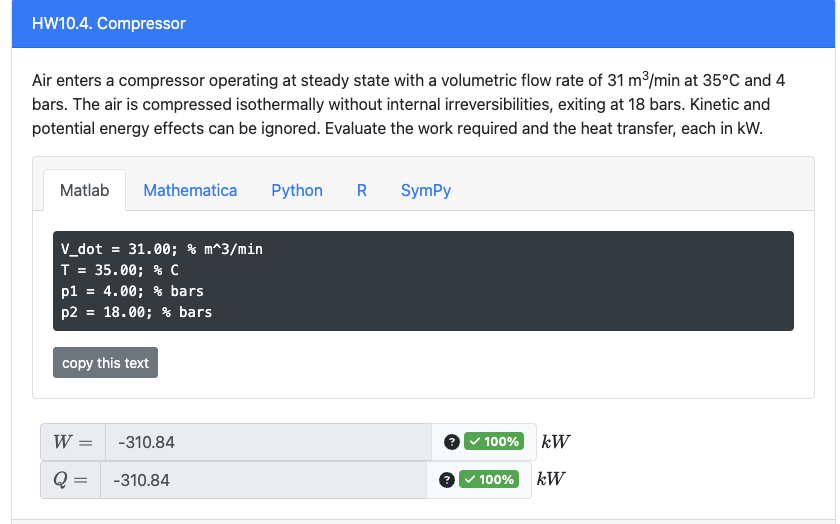

In [3]:
# 4
# 思路 
# isothermally 等温 Wout=n*R*T*ln(p2/p1)
# 可逆给到什么条件？？？
# 但是我的问题是为什么不计算h变化？？？？？ u的变化（因为直接输出了）
# 符号 因为是需要的，所以应该是-Wout


from sympy import *


V_dot = 31.00 # m^3/min
T = 35.00 # C
p1 = 4.00 # bars
p2 = 18.00 # bars


T =T+ 273.15  # 转换为绝对温度，单位：K
# 气体常数
R = 8.314  # J/(mol·K)

# 将单位转换为 SI 单位
V_dot = V_dot / 60  # m^3/s
p1_pa = p1 * 1e5  # Pa
p2_pa = p2 * 1e5  # Pa

# 计算摩尔流量
n_dot = (V_dot * p1_pa) / (R * T)


# 计算功（W）
W = -(n_dot * R * T * ln(p2_pa / p1_pa)) / 1000  # 转换为 kW


# 计算热量传递（Q）
Q = W  # 等温过程中热量传递等于功的大小，但方向相反

print(f"W = {W:.2f} kW")
print(f"Q = {Q:.2f} kW")

W = -310.84 kW
Q = -310.84 kW
